# Pokemon dataset

#### Andres Callanaupa

In this project, we will look at Pokemon data. We can learn more about Pokemon [here](http://www.pokemon.com/us/), but for the purposes of this project, we will only observe data which includes the name of the pokemon, its primary type, and its stats (Hit Points, Attack, Defense, Special Attack, Special Defense, and Speed). Note the total column as well. Although not used in the Pokemon game itself, it will be a valuable statistic for future computation.

For those who are not familiar with the Pokemon video game, it is a strategy role-playing game in which you catch and battle Pokemon to progress through the game. Each Pokemon has a predefined base statline for each of the six stats stated above.
A brief description of these can be found on the Wikipedia article [here](https://en.wikipedia.org/wiki/Gameplay_of_Pok%C3%A9mon#Stats).
In short:
* HP - A Pokemon's health. If it reaches 0, it faints and cannot battle until healed.
* Attack - How strong a Pokemon's physical attacks are.
* Defense - How defensive the Pokemon is against a phyiscal attack.
* Special Attack - How strong a Pokemon's special attacks are.
* Special Defense - How defensive the Pokemon is against a special attack.
* Speed - Determines the order of play between the two (or more) Pokemon, with the fastest Pokemon moving first.

Before going further, note that the data used for this project can be found [here](https://data.opendatasoft.com/explore/dataset/pokemon-with-stats%40public-us/table/?dataChart=eyJxdWVyaWVzIjpbeyJjb25maWciOnsiZGF0YXNldCI6InBva2Vtb24td2l0aC1zdGF0c0BwdWJsaWMtdXMiLCJvcHRpb25zIjp7InNvcnQiOiItdG90YWwifX0sImNoYXJ0cyI6W3sidHlwZSI6ImNvbHVtbiIsImZ1bmMiOiJBVkciLCJ5QXhpcyI6InRvdGFsIiwic2NpZW50aWZpY0Rpc3BsYXkiOnRydWUsImNvbG9yIjoiIzJDM0Y1NiJ9XSwieEF4aXMiOiJuYW1lIiwibWF4cG9pbnRzIjo1MCwic29ydCI6IiJ9XSwidGltZXNjYWxlIjoiIn0%3D) and exported as txt, csv, etc. Behind the scenes, we can scrub the data to make it fit our needs. Please find the files [here](http://i6.cims.nyu.edu/~avc278/data_bootcamp/scrub_pokemon_data.txt); just be sure that when you download it, you change the file extension to .py instead of .txt.

*For those who are up-to-date with Pokemon, note that any Pokemon with Mega Evolutions or alternate forms have been removed from the data for simplicity.*

So, now that we have that out of the way, why Pokemon? Sure, an analysis on time series data, or other traditional economic data come to mind, but Pokemon is something fun and exciting that I believe many people would find familiar and would appreciate a basic analysis and data visualization of.

Although it is a game for all ages, it also has a competitive aspect to the battling mechanics, where players from around the world compete to become champions. With this analysis, I hope to find why certain Pokemon are used in competitive battling over others--maybe their stats have something to do with it, or perhaps their movesets apply as well (which unfortunately will not be covered in this project).

With this data, I plan on displaying different statistical information for the pokemon, including the following:
* basic summary of statistics (max, min, avg, std dev)
* display new tables of pokemon who are above average and below average in each stat
* comparison of Pokemon used in top tier competitive battling and those in our top tier table

In [1]:
%matplotlib inline                     

import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import numpy as np                     # foundation for Pandas

In [2]:
url = 'http://i6.cims.nyu.edu/~avc278/data_bootcamp/final_pokemon_stats.csv'

In [3]:
col_indices = [0, 1, 4, 5, 6, 7, 8, 9]  #note we have Total in col_indices 3 already, but we can compute this ourselves below.

poke = pd.read_csv(url, 
        sep = ',',
        #index_col=1,
        usecols=col_indices,
        engine='python',
        encoding="utf-8-sig") # This is necessary otherwise we cannot use the 'Name' column..... weird.....

In [4]:
poke_og = poke

In [5]:
poke.head()

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Wartortle,Water,59,63,80,65,80,58
1,Caterpie,Bug,45,30,35,20,20,45
2,Butterfree,Bug,60,45,50,90,80,70
3,Rattata,Normal,30,56,35,25,35,72
4,Arbok,Poison,60,85,69,65,79,80


In [6]:
poke.dtypes

Name       object
Type 1     object
HP          int64
Attack      int64
Defense     int64
Sp. Atk     int64
Sp. Def     int64
Speed       int64
dtype: object

Let's now calculate our total values for each Pokemon in the dataset. We'll use this value shortly to compare Pokemon based on their total stats.
We can see that after performing this task, we can calculate our own totals, and further add on to the dataframe.

Once we add the Calc total column, let's check out our new and improved dataframe.

In [9]:
poke['Calc total'] = poke['HP'] + poke['Attack'] + poke['Defense'] + poke['Sp. Atk'] + poke['Sp. Def'] + poke['Speed']

In [10]:
poke.head()

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Calc total
0,Wartortle,Water,59,63,80,65,80,58,405
1,Caterpie,Bug,45,30,35,20,20,45,195
2,Butterfree,Bug,60,45,50,90,80,70,395
3,Rattata,Normal,30,56,35,25,35,72,253
4,Arbok,Poison,60,85,69,65,79,80,438


Now that we calculated the Total for each Pokemon in our dataframe, let's try to graph it with the Pokemon on the x-axis and their associated Total values on the y-axis.

But before we do that, let's take some summary statistics to know what we're dealing with, ignoring the Calc total column for now.

In [7]:
poke_og.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,68.157447,74.573050,70.509220,68.069504,68.733333,65.222695
std,25.677511,28.723369,29.250539,28.212555,26.739480,27.089394
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000
50%,65.000000,73.000000,65.000000,65.000000,65.000000,64.000000
75%,80.000000,94.000000,85.000000,87.000000,85.000000,85.000000
max,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000


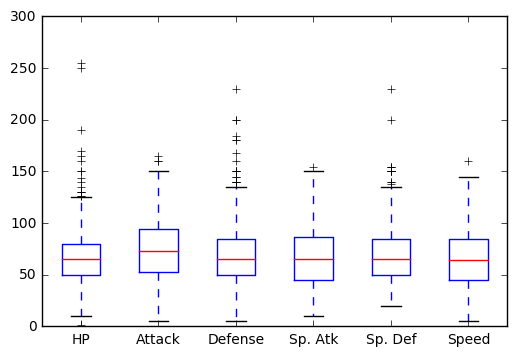

In [8]:
poke_og.plot.box()

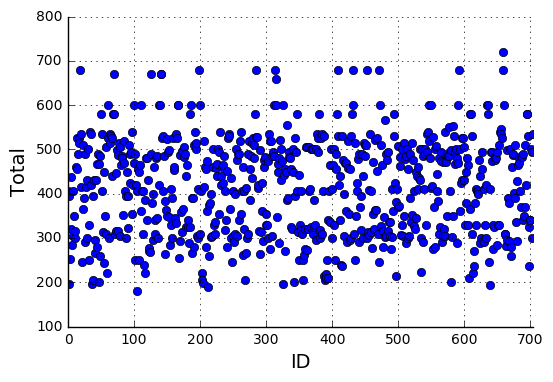

In [11]:
fig, ax = plt.subplots()

poke['Calc total'].plot(ax=ax, style='o', grid=True)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylabel('Total',fontsize=14)
ax.set_xlabel('ID',fontsize=14)
plt.show()

Doesn't look too nice huh? Some Pokemon are clearly above average, some are below average, while the rest are somewhere in the middle of it all.
Let's separate them into smaller sections to hopefully understand them better.

For each section that we make, we will generate two visuals to help us understand the deviations of the Pokemon within the tiers.
Visual 1 displays Pokemon by their Attack and Defense in a scatter plot format with the size as a function of the Calc total value per Pokemon.
Visual 2 displays a box plot for each stat (HP, Attack, ...) except for Calc total. We could display Calc total, but it would overshadow the information displayed from the other stats.

In [12]:
cond_600 = poke[(poke['Calc total']>=600)]
cond_500 = poke[(poke['Calc total']>=500) & (poke['Calc total']<600)]
cond_400 = poke[(poke['Calc total']>=400) & (poke['Calc total']<500)]
cond_300 = poke[(poke['Calc total']>=300) & (poke['Calc total']<400)]
cond_0 = poke[(poke['Calc total']<300)]

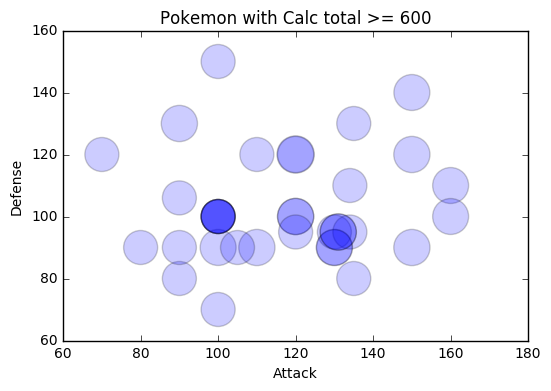

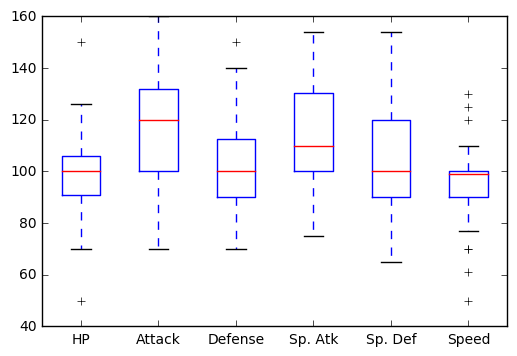

In [13]:
fig, ax = plt.subplots()

ax.scatter(cond_600['Attack'], cond_600['Defense'],
           s=cond_600['Calc total'],
           alpha=0.2)
ax.set_title('Pokemon with Calc total >= 600')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')

plt.show()

cond_600_og = cond_600.drop('Calc total',1)
cond_600_og.plot.box()

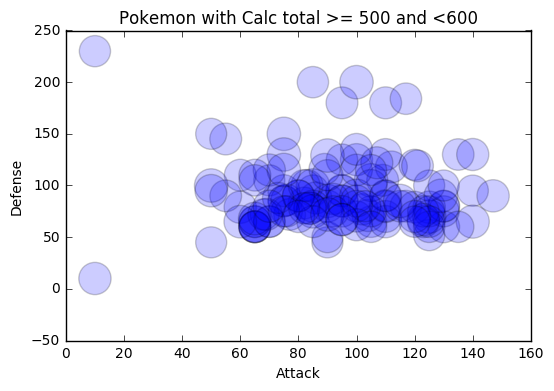

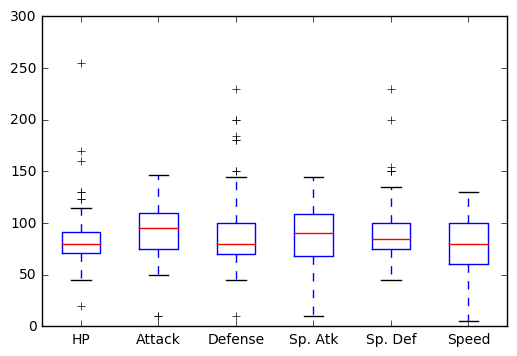

In [14]:
fig, ax = plt.subplots()

ax.scatter(cond_500['Attack'], cond_500['Defense'],
           s=cond_500['Calc total'],
           alpha=0.2)
ax.set_title('Pokemon with Calc total >= 500 and <600')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')

plt.show()

cond_500_og = cond_500.drop('Calc total',1)
cond_500_og.plot.box()

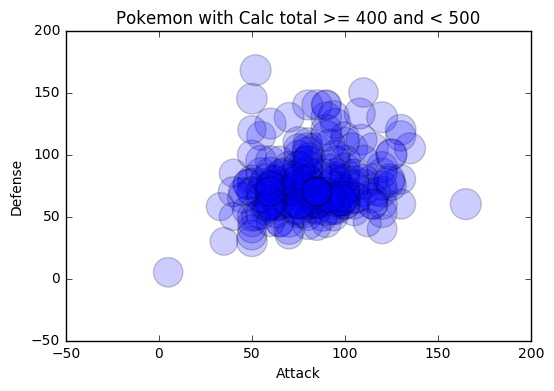

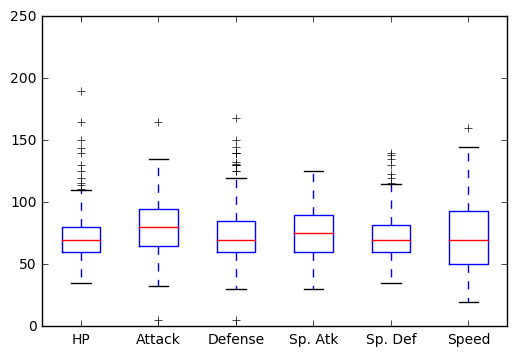

In [15]:
fig, ax = plt.subplots()

ax.scatter(cond_400['Attack'], cond_400['Defense'],
           s=cond_400['Calc total'],
           alpha=0.2)
ax.set_title('Pokemon with Calc total >= 400 and < 500')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')

plt.show()

cond_400_og = cond_400.drop('Calc total',1)
cond_400_og.plot.box()

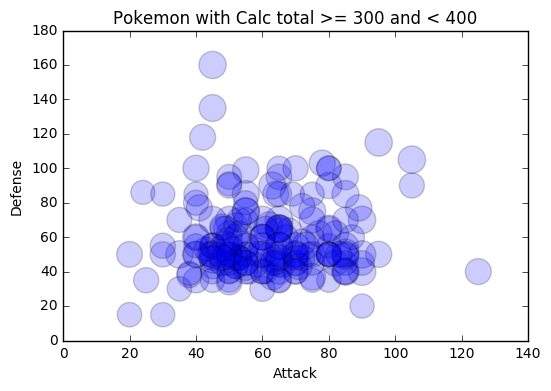

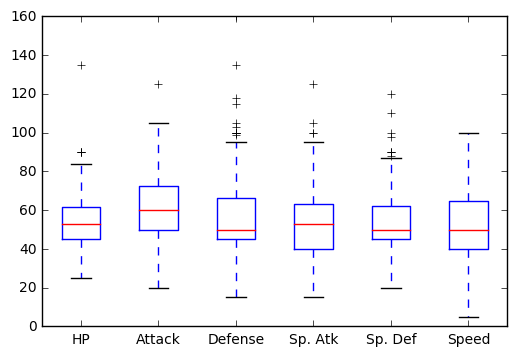

In [16]:
fig, ax = plt.subplots()

ax.scatter(cond_300['Attack'], cond_300['Defense'],
           s=cond_300['Calc total'],
           alpha=0.2)
ax.set_title('Pokemon with Calc total >= 300 and < 400')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')

plt.show()

cond_300_og = cond_300.drop('Calc total',1)
cond_300_og.plot.box()

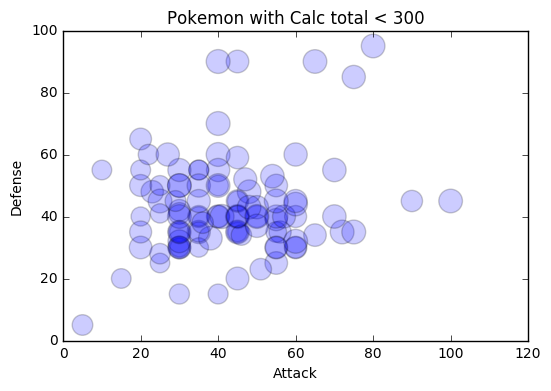

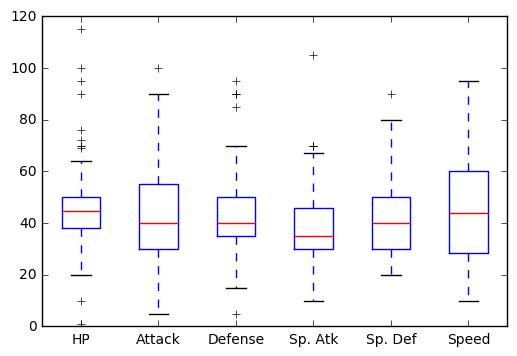

In [17]:
fig, ax = plt.subplots()

ax.scatter(cond_0['Attack'], cond_0['Defense'],
           s=cond_0['Calc total'],
           alpha=0.2)
ax.set_title('Pokemon with Calc total < 300')
ax.set_xlabel('Attack')
ax.set_ylabel('Defense')

plt.show()

cond_0_og = cond_0.drop('Calc total',1)
cond_0_og.plot.box()

We can now sort through the data with the sort method. Let's sort our Pokemon by each stat value, displaying those that are above average and below average in different sections.

In [18]:
hp_a = poke[(poke['HP']>=poke['HP'].mean())]
hp_b = poke[(poke['HP']<poke['HP'].mean())]

atk_a = poke[(poke['Attack']>=poke['Attack'].mean())]
atk_b = poke[(poke['Attack']<poke['Attack'].mean())]

def_a = poke[(poke['Defense']>=poke['Defense'].mean())]
def_b = poke[(poke['Defense']<poke['Defense'].mean())]

satk_a = poke[(poke['Sp. Atk']>=poke['Sp. Atk'].mean())]
satk_b = poke[(poke['Sp. Atk']<poke['Sp. Atk'].mean())]

sdef_a = poke[(poke['Sp. Def']>=poke['Sp. Def'].mean())]
sdef_b = poke[(poke['Sp. Def']<poke['Sp. Def'].mean())]

spd_a = poke[(poke['Speed']>=poke['Speed'].mean())]
spd_b = poke[(poke['Speed']<poke['Speed'].mean())]

Here's a sample of the work done.
We will look at above average and below average stats graphically.

In [19]:
hp_a.head()

,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Calc total
11,Slowpoke,Water,90,65,65,40,40,15,315
15,Tauros,Normal,75,100,95,40,70,110,490
17,Aerodactyl,Rock,80,105,65,60,75,130,515
18,Mewtwo,Psychic,106,110,90,154,90,130,680
19,Furret,Normal,85,76,64,45,55,90,415


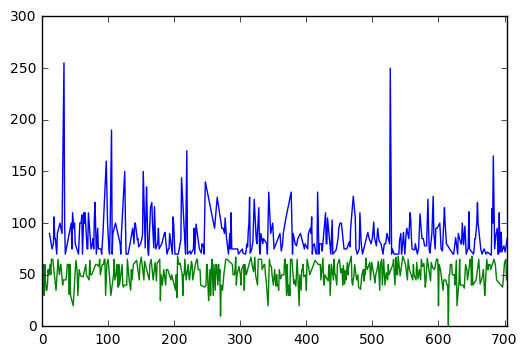

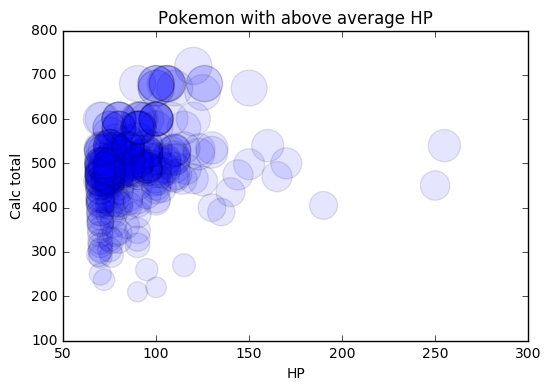

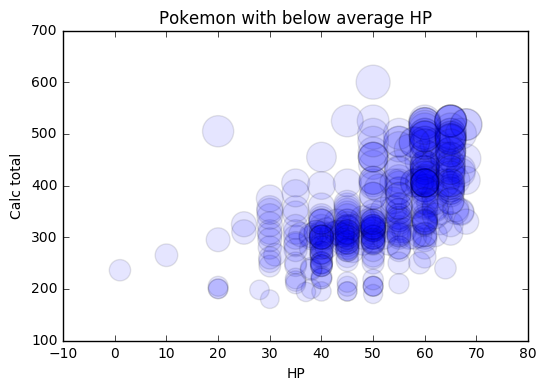

In [20]:
hp_a['HP'].plot(legend=False)
hp_b['HP'].plot(legend=False)


fig, ax = plt.subplots()

ax.scatter(hp_a['HP'], hp_a['Calc total'],
           s=hp_a['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with above average HP')
ax.set_xlabel('HP')
ax.set_ylabel('Calc total')

plt.show()

fig, ax = plt.subplots()

ax.scatter(hp_b['HP'], hp_b['Calc total'],
           s=hp_b['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with below average HP')
ax.set_xlabel('HP')
ax.set_ylabel('Calc total')

plt.show()

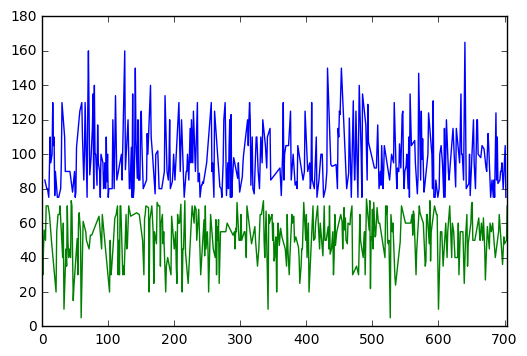

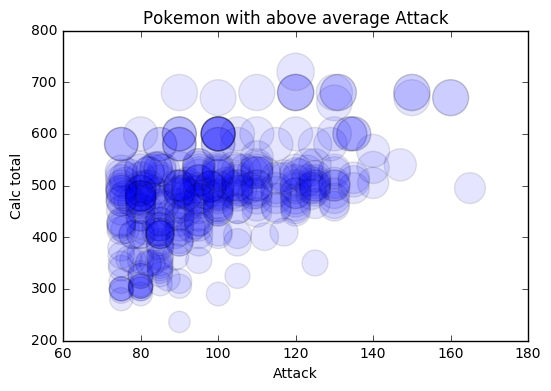

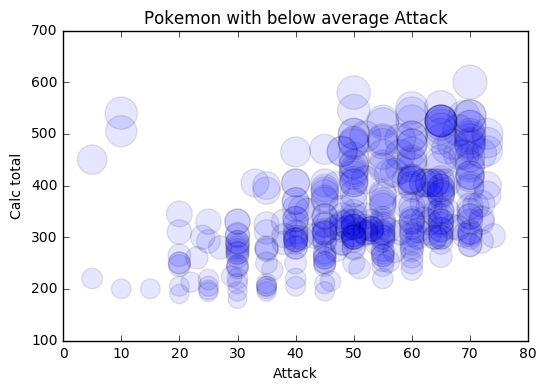

In [21]:
atk_a['Attack'].plot(legend=False)
atk_b['Attack'].plot(legend=False)

fig, ax = plt.subplots()

ax.scatter(atk_a['Attack'], atk_a['Calc total'],
           s=atk_a['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with above average Attack')
ax.set_xlabel('Attack')
ax.set_ylabel('Calc total')

plt.show()

fig, ax = plt.subplots()

ax.scatter(atk_b['Attack'], atk_b['Calc total'],
           s=atk_b['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with below average Attack')
ax.set_xlabel('Attack')
ax.set_ylabel('Calc total')

plt.show()

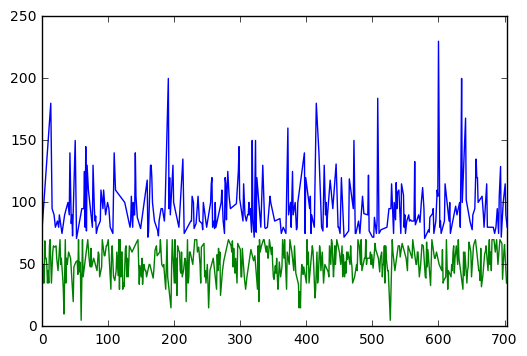

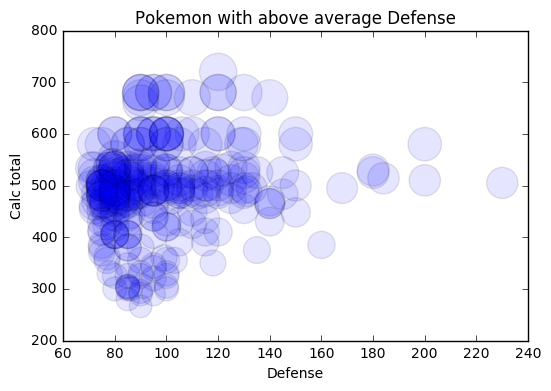

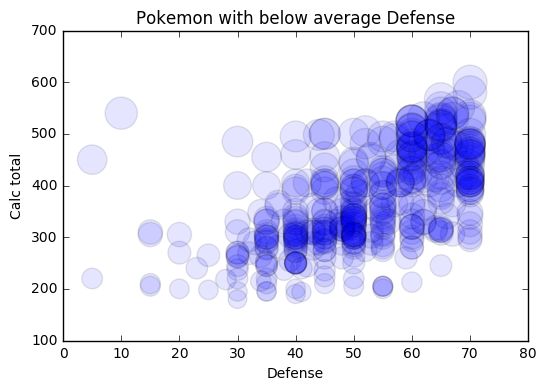

In [22]:
def_a['Defense'].plot(legend=False)
def_b['Defense'].plot(legend=False)

fig, ax = plt.subplots()

ax.scatter(def_a['Defense'], def_a['Calc total'],
           s=def_a['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with above average Defense')
ax.set_xlabel('Defense')
ax.set_ylabel('Calc total')

plt.show()

fig, ax = plt.subplots()

ax.scatter(def_b['Defense'], def_b['Calc total'],
           s=def_b['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with below average Defense')
ax.set_xlabel('Defense')
ax.set_ylabel('Calc total')

plt.show()

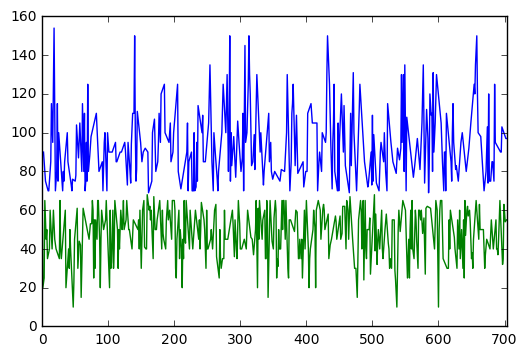

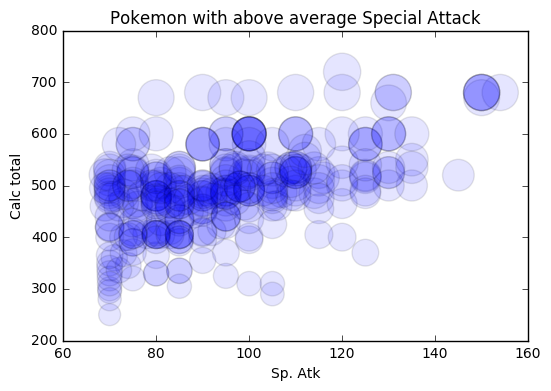

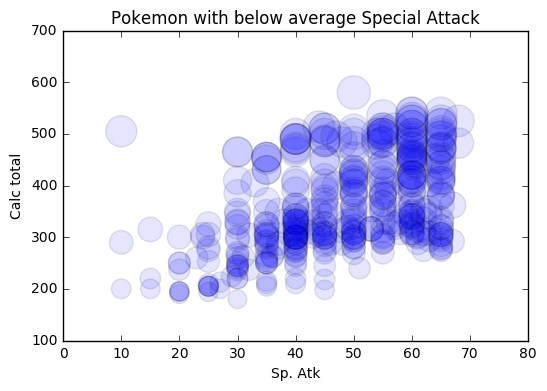

In [23]:
satk_a['Sp. Atk'].plot(legend=False)
satk_b['Sp. Atk'].plot(legend=False)

fig, ax = plt.subplots()

ax.scatter(satk_a['Sp. Atk'], satk_a['Calc total'],
           s=satk_a['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with above average Special Attack')
ax.set_xlabel('Sp. Atk')
ax.set_ylabel('Calc total')

plt.show()

fig, ax = plt.subplots()

ax.scatter(satk_b['Sp. Atk'], satk_b['Calc total'],
           s=satk_b['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with below average Special Attack')
ax.set_xlabel('Sp. Atk')
ax.set_ylabel('Calc total')

plt.show()

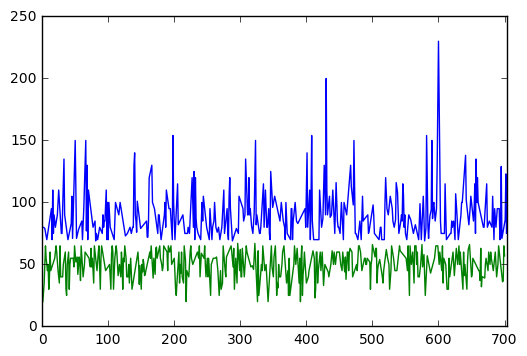

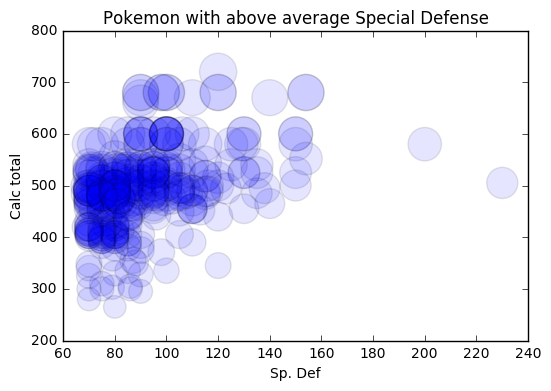

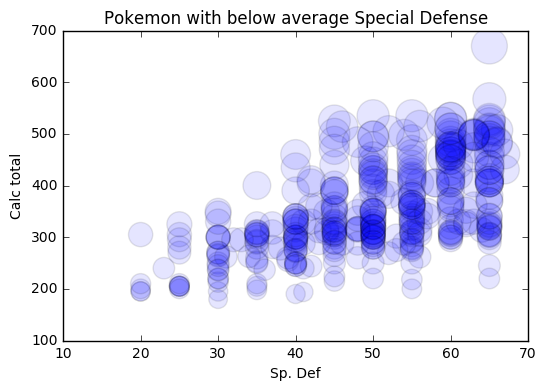

In [24]:
sdef_a['Sp. Def'].plot(legend=False)
sdef_b['Sp. Def'].plot(legend=False)

fig, ax = plt.subplots()

ax.scatter(sdef_a['Sp. Def'], sdef_a['Calc total'],
           s=sdef_a['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with above average Special Defense')
ax.set_xlabel('Sp. Def')
ax.set_ylabel('Calc total')

plt.show()

fig, ax = plt.subplots()

ax.scatter(sdef_b['Sp. Def'], sdef_b['Calc total'],
           s=sdef_b['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with below average Special Defense')
ax.set_xlabel('Sp. Def')
ax.set_ylabel('Calc total')

plt.show()

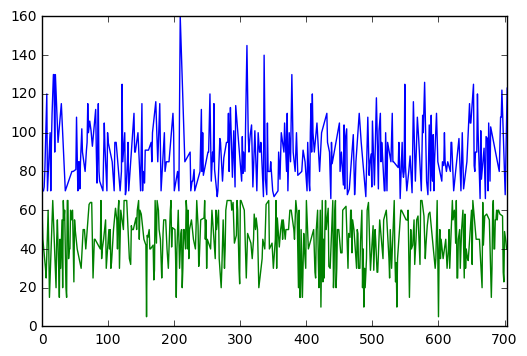

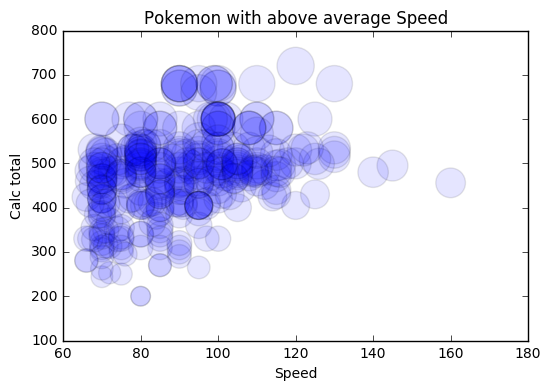

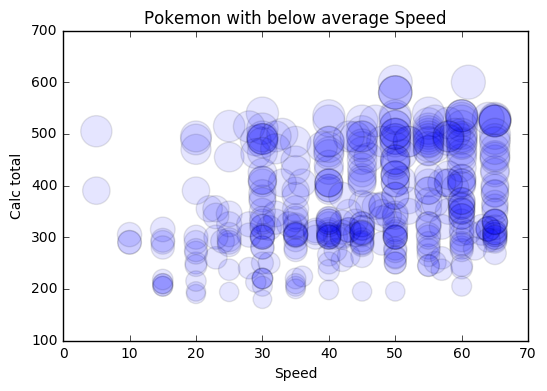

In [25]:
spd_a['Speed'].plot(legend=False)
spd_b['Speed'].plot(legend=False)

fig, ax = plt.subplots()

ax.scatter(spd_a['Speed'], spd_a['Calc total'],
           s=spd_a['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with above average Speed')
ax.set_xlabel('Speed')
ax.set_ylabel('Calc total')

plt.show()

fig, ax = plt.subplots()

ax.scatter(spd_b['Speed'], spd_b['Calc total'],
           s=spd_b['Calc total'],
           alpha=0.1)
ax.set_title('Pokemon with below average Speed')
ax.set_xlabel('Speed')
ax.set_ylabel('Calc total')

plt.show()

And here is the same data but for each stat value (above and below average).

In [26]:
print("Above average HP")
print(hp_a.head().sort('HP', ascending=False),"\n")
print("Below average HP")
print(hp_b.head().sort('HP'),"\n")
print("Above average Attack")
print(atk_a.head().sort('Attack', ascending=False),"\n")
print("Below average Attack")
print(atk_b.head().sort('Attack'),"\n")
print("Above average Defense")
print(def_a.head().sort('Defense', ascending=False),"\n")
print("Below average Defense")
print(def_b.head(),"\n")
print("Above average Special Attack")
print(satk_a.head().sort('Sp. Atk', ascending=False),"\n")
print("Below average Special Attack")
print(satk_b.head(),"\n")
print("Above average Special Defense")
print(sdef_a.head().sort('Sp. Def', ascending=False),"\n")
print("Below average Special Defense")
print(sdef_b.head(),"\n")
print("Above average Speed")
print(spd_a.head().sort('Speed', ascending=False),"\n")
print("Below average Speed")
print(spd_b.head())

Above average HP
          Name   Type 1   HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
18      Mewtwo  Psychic  106     110       90      154       90    130   
11    Slowpoke    Water   90      65       65       40       40     15   
19      Furret   Normal   85      76       64       45       55     90   
17  Aerodactyl     Rock   80     105       65       60       75    130   
15      Tauros   Normal   75     100       95       40       70    110   

    Calc total  
18         680  
11         315  
19         415  
17         515  
15         490   

Below average HP
         Name  Type 1  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
3     Rattata  Normal  30      56       35       25       35     72   
1    Caterpie     Bug  45      30       35       20       20     45   
0   Wartortle   Water  59      63       80       65       80     58   
2  Butterfree     Bug  60      45       50       90       80     70   
4       Arbok  Poison  60      85       69       65       79  

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: sort(col

<br><br>
Now, we will compare our findings to tier lists in competitive battling. Let's compare our data to the [uber](http://www.smogon.com/dex/xy/formats/uber/) tier list from [Smogon](http://www.smogon.com/), 

But first, let's display our findings by section (cond_600, cond_500, ...) in a histogram format.

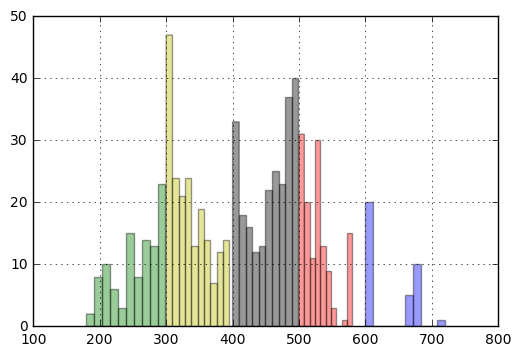

In [27]:
cond_600['Calc total'].hist(alpha=0.4, bins=10, color='b')
cond_500['Calc total'].hist(alpha=0.4, bins=10, color='r')
cond_400['Calc total'].hist(alpha=0.4, bins=10, color='k')
cond_300['Calc total'].hist(alpha=0.4, bins=10, color='y')
cond_0['Calc total'].hist(alpha=0.4, bins=10, color='g')

We will form an argument that choosing the Pokemon with the greatest value for Calc total will be the most competitive Pokemon. Disregarding different movesets and different abilities that Pokemon can have, we would have no reason to pick a Pokemon with a lesser Calc total value as it would be dominated by one with a greater value.

Zooming in to the blue section of the histogram, we can see the distribution of Pokemon in this section. Let's compare these Pokemon to the Uber tier list in Smogon, in which all Pokemon can participate, but one would normally choose the stronger Pokemon that would be banned in the tier below this one due to raw strength.

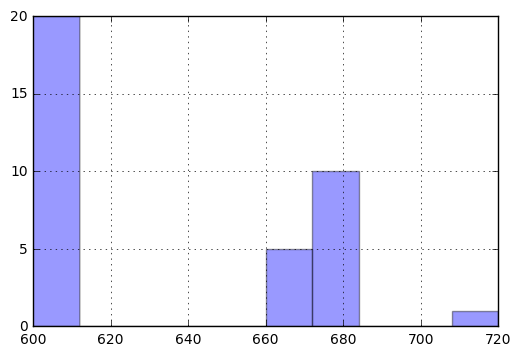

In [28]:
cond_600['Calc total'].hist(alpha=0.4, bins=10, color='b')

Let's display all the Pokemon with at least a Calc total of 600.

In [29]:
cond_600.sort('Name')

C:\Users\Andres\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Name,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Calc total
659,Arceus,Normal,120,120,120,120,120,120,720
199,Celebi,Psychic,100,100,100,100,100,100,600
166,Cresselia,Psychic,120,70,120,75,130,85,600
549,Darkrai,Dark,70,90,90,135,90,125,600
658,Dialga,Steel,100,120,120,150,100,90,680
472,Diancie,Rock,50,100,150,100,150,50,600
186,Dragonite,Dragon,91,134,95,100,100,80,600
60,Garchomp,Dragon,108,130,95,80,85,102,600
315,Genesect,Bug,71,120,95,120,95,99,600
590,Goodra,Dragon,90,100,70,110,150,80,600


Comparing the two sets, we get the Pokemon in the Uber tier (ignoring those that do not exist in our dataset):
Arceus, Darkrai, Dialga, Genesect, Greninja, Ho-Oh, Kyogre, Lugia, Mewtwo, Palkia, Rayquaza, Reshiram, Xerneas, Yveltal, and Zekrom.

Of the 15 pokemon in the Uber tier that exist in our dataset, 14 of them exist in our dataframe cond_600. We assume this is because of the Pokemon's raw strength, and the one Pokemon that isn't on this list is due to its moveset, or type advantage, or some other reason not explained through the stat values of the individual Pokemon.

### Conclusion
<br>
From our data, we can see that the strongest Pokemon do in fact exist, and there is a strong overlap between the two sets. If we wish to make a competitive team based on raw stats alone, we should pick Pokemon with the greatest Calc total value first. Note, however, that this does not take into account the moves that are available to them, nor does it take into account the abilities that the Pokemon can have.
<br><br>
The next step would be to analyze the different moves that Pokemon can learn, and the abilities that they can have, then compare with the Smogon tier list to see if we can see overlap like we did above.